# Quantum teleportation

In this exercise we implement the quantum teleportation protocol.

You might need to install `pylatexenc`.

In [ ]:
pip install pylatexenc

In [1]:
import numpy as np
from qiskit import QuantumCircuit, Aer, execute, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import random_statevector
from qiskit.visualization import plot_bloch_multivector

We are going to use 3 qubits and 2 classical bits. Here are their registers. 

In [2]:
q_reg = QuantumRegister(3)
cx_reg = ClassicalRegister(1)
cz_reg = ClassicalRegister(1)

Then we have to choose some quantum state which we want to teleport. Let's simply take a random state.

Statevector([-0.13324848-0.65505783j,  0.12698212-0.73281623j],
            dims=(2,))


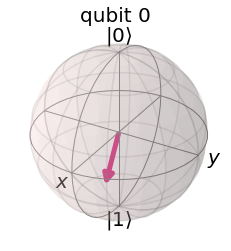

In [3]:
teleport_state = random_statevector(2)
print(teleport_state)
plot_bloch_multivector(teleport_state)

Hint: you might need a way to apply quantum gates conditional on the states of classical bits. Here's an example on how to do it:

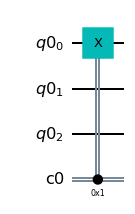

In [4]:
example = QuantumCircuit(q_reg, cx_reg)
example.x(0).c_if(cx_reg, 1)
example.draw('mpl')

This would apply $X$ on the first qubit if the classical register is in state 1.

Now we build our circuit. <span style="color:red">Fill in the necessary parts in the circuit below.</span>

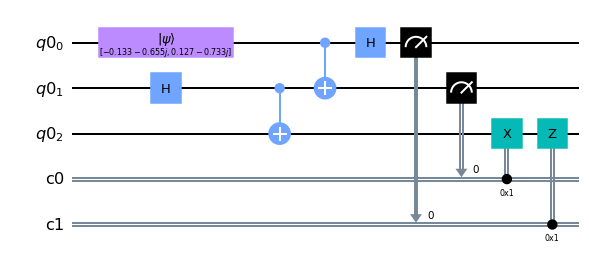

In [5]:
circ = QuantumCircuit(q_reg, cx_reg, cz_reg)
# Qubit 0 holds the state to teleport
circ.initialize(teleport_state.data, 0)
# The qubits 1 and 2 need to be in the Bell state (|00>+|11>)/sqrt(2). Add gates which prepare this state.
# --- Add your gates here ---
circ.h(1)
circ.cx(1, 2)
circ.barrier()
# Now the quantum states are prepared. Fill in the rest of the protocol.
# --- Add your gates here ---
circ.cx(0, 1)
circ.h(0)
circ.barrier()
circ.measure(0, cz_reg)
circ.measure(1, cx_reg)
circ.x(2).c_if(cx_reg, 1)
circ.z(2).c_if(cz_reg, 1)
# Your circuit looks like this
circ.draw('mpl', plot_barriers=False)

We finally run the circuit.

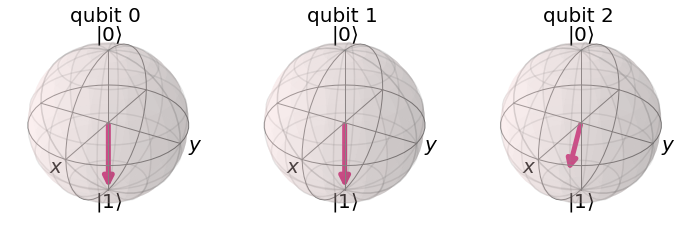

In [6]:
simulator = Aer.get_backend('statevector_simulator')

output_state = execute(circ, simulator).result().get_statevector()
plot_bloch_multivector(output_state)

If the teleportation protocol worked, then the last qubit is in the same state as the original state to teleport and the first two qubits collapse to random computational basis state.